# preprocessing.StandardScaler (z-score)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 0.24.2
numpy   version = 1.16.2
seaborn version = 0.9.0


# Boston House Prices
https://www.kaggle.com/vikrishnan/boston-house-prices

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


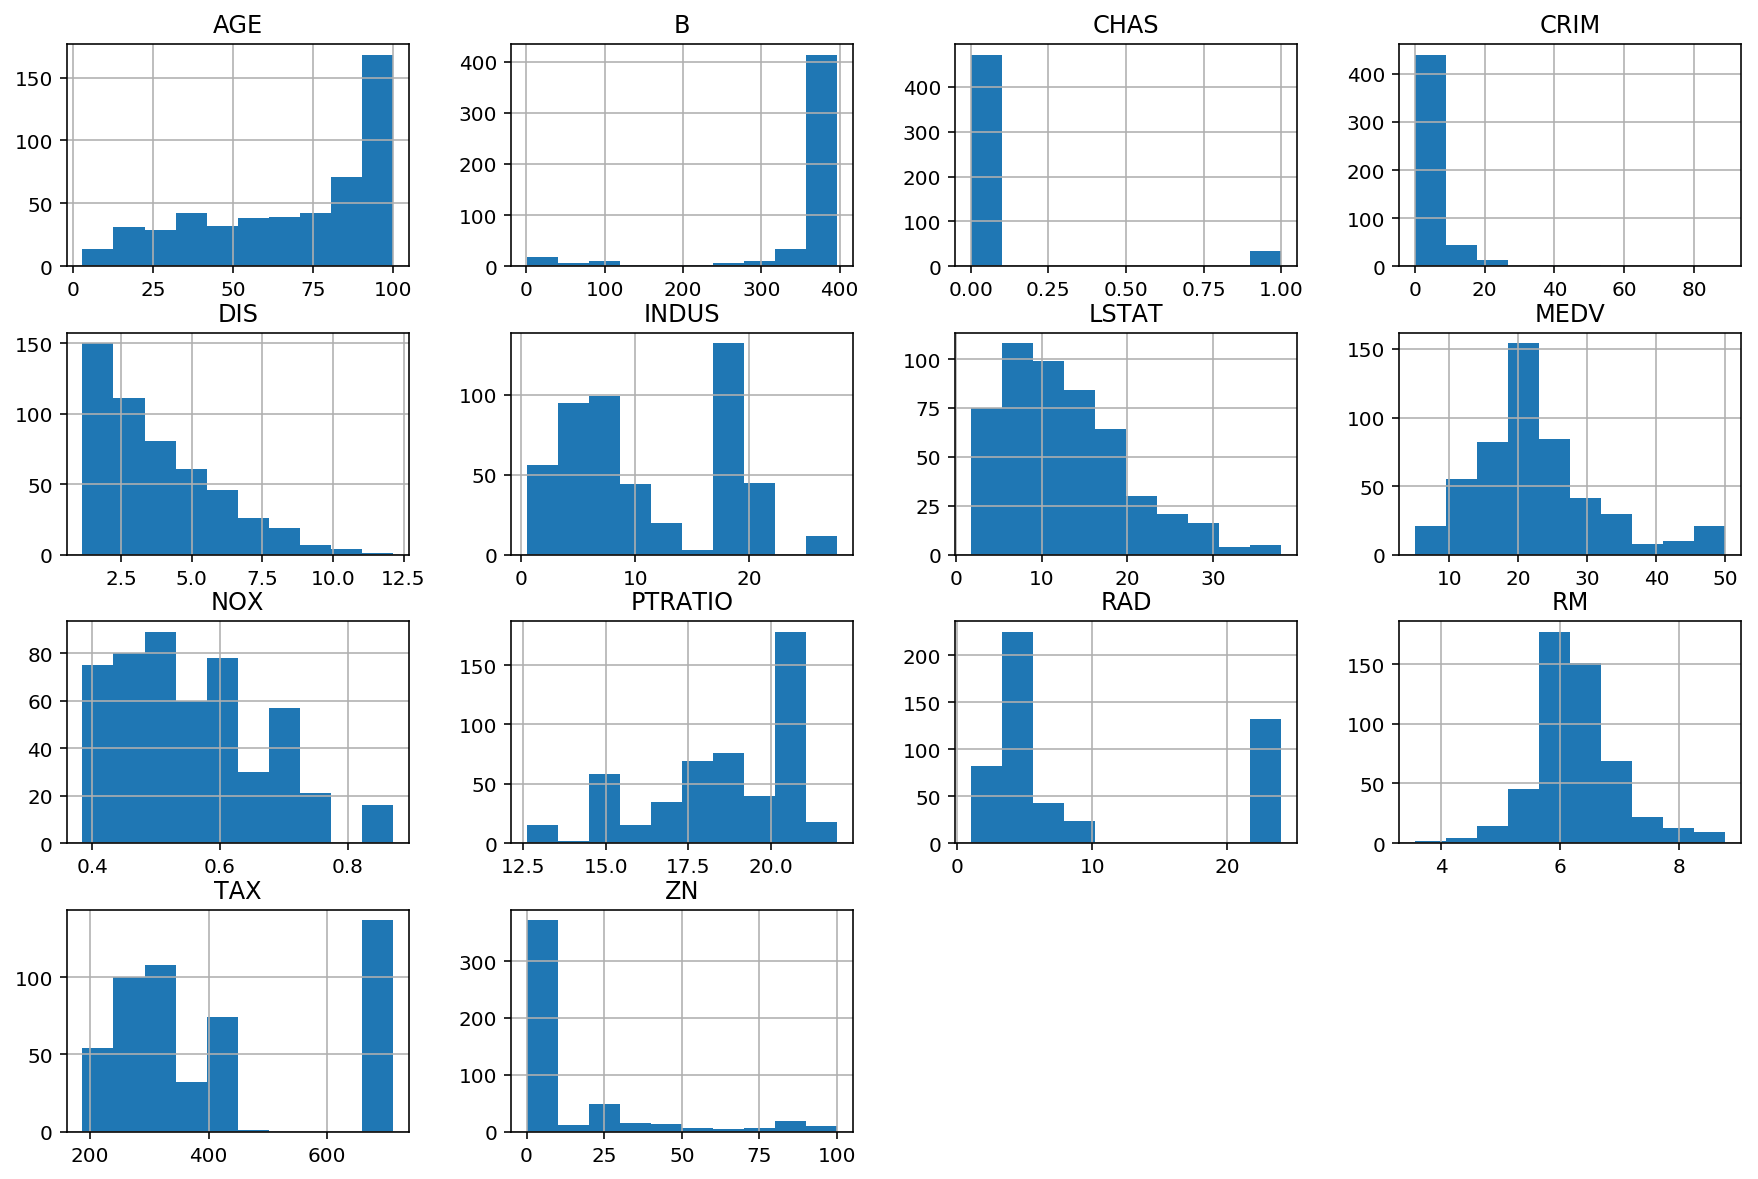

In [4]:
df.hist(figsize=(15, 10));

## sklearn preprocessing

In [5]:
from sklearn import preprocessing

In [6]:
scaler = preprocessing.StandardScaler() # create StandardScaler instance
scaler.fit(df[['RM']]) # compute the mean and std
z=scaler.transform(df[['RM']]) # calc z-score
z[:5] # 2D numpy array

array([[0.41367189],
       [0.19427445],
       [1.28271368],
       [1.01630251],
       [1.22857665]])

In [7]:
print(f"mean = {z.mean()}")
print(f"std = {z.std()}")

mean = -4.563762630870209e-17
std = 0.9999999999999999


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df['z_RM']=z[:, 0]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,z_RM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.413672
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.194274
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.282714
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.016303
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.228577


In [10]:
scaler=preprocessing.StandardScaler()
cols=['RM', 'MEDV']
scaler.fit(df[cols])
z=scaler.transform(df[cols])
z[:5]

array([[ 0.41367189,  0.15968566],
       [ 0.19427445, -0.10152429],
       [ 1.28271368,  1.32424667],
       [ 1.01630251,  1.18275795],
       [ 1.22857665,  1.48750288]])

In [11]:
z.mean(axis=0)

array([-4.56376263e-17, -5.19566823e-16])

In [12]:
z.std(axis=0)

array([1., 1.])

In [13]:
ds=pd.concat([df, pd.DataFrame(z, columns=['z_room', 'z_medv'])], axis='columns')
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,z_RM,z_room,z_medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.413672,0.413672,0.159686
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.194274,0.194274,-0.101524
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.282714,1.282714,1.324247
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.016303,1.016303,1.182758
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.228577,1.228577,1.487503


---

## Compare raw score with z-score 

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'z_RM'],
      dtype='object')

In [15]:
cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_CRIM',
 'z_ZN',
 'z_INDUS',
 'z_CHAS',
 'z_NOX',
 'z_RM',
 'z_AGE',
 'z_DIS',
 'z_RAD',
 'z_TAX',
 'z_PTRATIO',
 'z_B',
 'z_LSTAT',
 'z_MEDV']

In [16]:
scaler=preprocessing.StandardScaler()
z=scaler.fit_transform(df[cols])
z[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ,  1.32424667],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682,  1.18275795],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44

### histogram: raw score

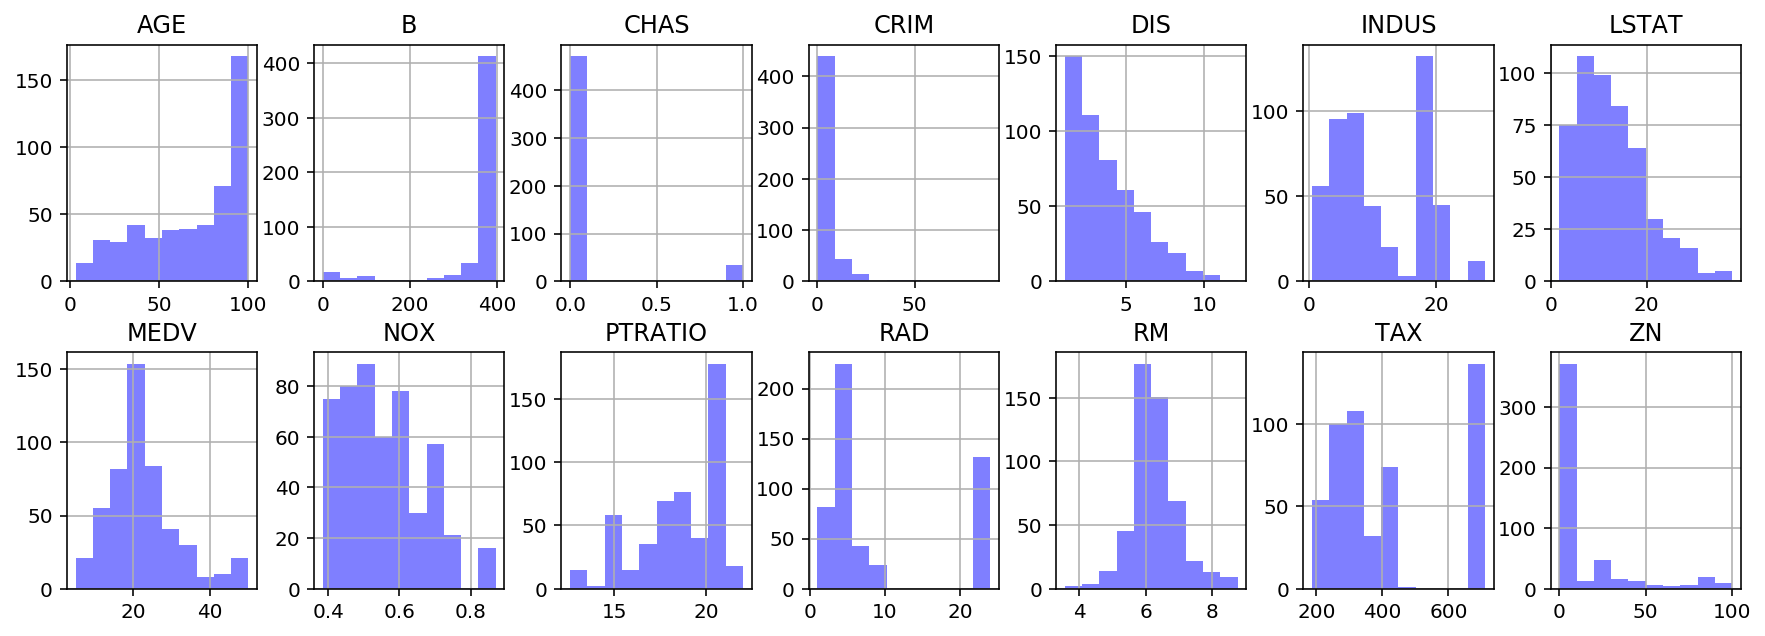

In [17]:
df[cols].hist(layout=(2, 7), figsize=(15, 5), color='blue', alpha=.5);

### histogram: z-score score

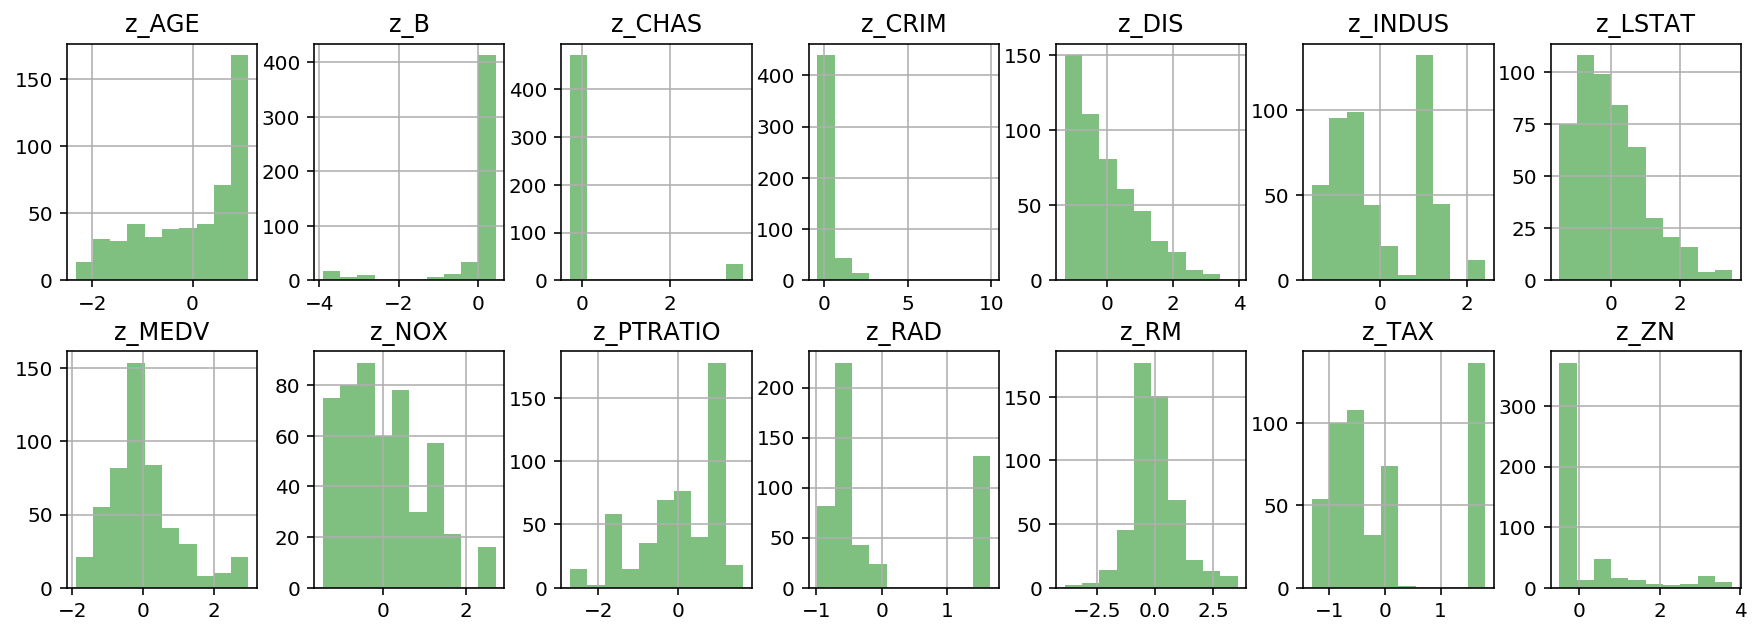

In [18]:
dz=pd.DataFrame(z, columns=z_cols)
dz[z_cols].hist(layout=(2, 7), figsize=(15, 5), color='green', alpha=.5);